In [26]:
import pandas as pd
from math import erf, sqrt
import numpy as np

# Carregar os dados do arquivo CSV
file_path = "/content/drive/MyDrive/MAT/ponderada_semana3/DadosC.csv"
df = pd.read_csv(file_path)

# Usa o nome correto das colunas no dataframe
mean_pred = df['PREVISÃO DE VENDAS\n(SALES FORECAST)'].mean()
mean_real = df['VENDAS REAIS\n(REAL SALES)'].mean()
n = len(df)

# Calcula o desvio padrão populacional para VENDAS REAIS
std_real_pop = df['VENDAS REAIS\n(REAL SALES)'].std(ddof=0)

# Z (usando o desvio padrão populacional das VENDAS REAIS conforme ITEM 2)
sigma_pop_real = std_real_pop # Definindo sigma_pop_real explicitamente para clareza

z = (mean_pred - mean_real) / (sigma_pop_real / (n ** 0.5))
print("Z =", z)

# Valor crítico (para nível de significância de 5%, teste bicaudal)
z_crit = 1.96

# p-valor (teste bicaudal)
def norm_cdf(x):
    return 0.5 * (1 + erf(x / sqrt(2)))

p_value = 2 * (1 - norm_cdf(abs(z)))
print("p-valor =", p_value)

# Conclusão (comparando p-valor com nível de significância de 5% ou Z com Z crítico)
alpha = 0.05
if p_value < alpha:
    print("Rejeita H0: A média da previsão de vendas é significativamente diferente da média real de vendas.")
else:
    print("Não rejeita H0: Não há evidência suficiente para concluir que a média da previsão de vendas é significativamente diferente da média real de vendas.")

# Imprime os resultados calculados no Item 1a novamente para referência
print(f"\nResultados do Item 1a (para referência):")
print(f"Média Vendas Previstas: {mean_pred:.1f}")
print(f"Desvio Padrão Populacional Vendas Previstas: {df['PREVISÃO DE VENDAS\n(SALES FORECAST)'].std(ddof=0):.1f}")
print(f"Média Vendas Reais: {mean_real:.1f}")
print(f"Desvio Padrão Populacional Vendas Reais: {std_real_pop:.1f}")
print(f"Número de pontos de dados (n): {n}")

Z = -1.216300761128031
p-valor = 0.22387037169854285
Não rejeita H0: Não há evidência suficiente para concluir que a média da previsão de vendas é significativamente diferente da média real de vendas.

Resultados do Item 1a (para referência):
Média Vendas Previstas: 134.8
Desvio Padrão Populacional Vendas Previstas: 4.1
Média Vendas Reais: 135.3
Desvio Padrão Populacional Vendas Reais: 4.2
Número de pontos de dados (n): 100


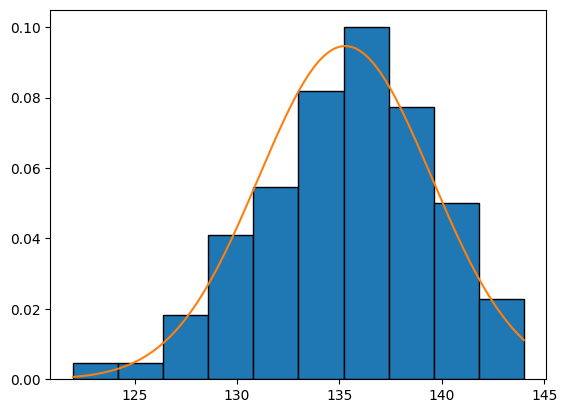

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

real = df['VENDAS REAIS\n(REAL SALES)']
std_real = real.std() # Calcula o desvio padrão
mu, sigma = mean_real, std_real

plt.hist(real, bins=10, density=True, edgecolor='black')
xs = np.linspace(real.min(), real.max(), 200)
plt.plot(xs, norm.pdf(xs, mu, sigma))
plt.show()

In [28]:
from scipy.stats import norm

pred = df['PREVISÃO DE VENDAS\n(SALES FORECAST)']
std_pred = pred.std()

prob = norm.cdf(130, loc=mean_pred, scale=std_pred)
print("Probabilidade:", prob)

Probabilidade: 0.12370749212503729


In [29]:
n = len(df)
z = (mean_pred - mean_real) / (std_real / (n ** 0.5))
print("Z:", z)

# Valor crítico
z_crit = 1.96
# p-valor
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z)))
print("p-valor:", p_value)


Z: -1.2102039770656108
p-valor: 0.22620063240398536
